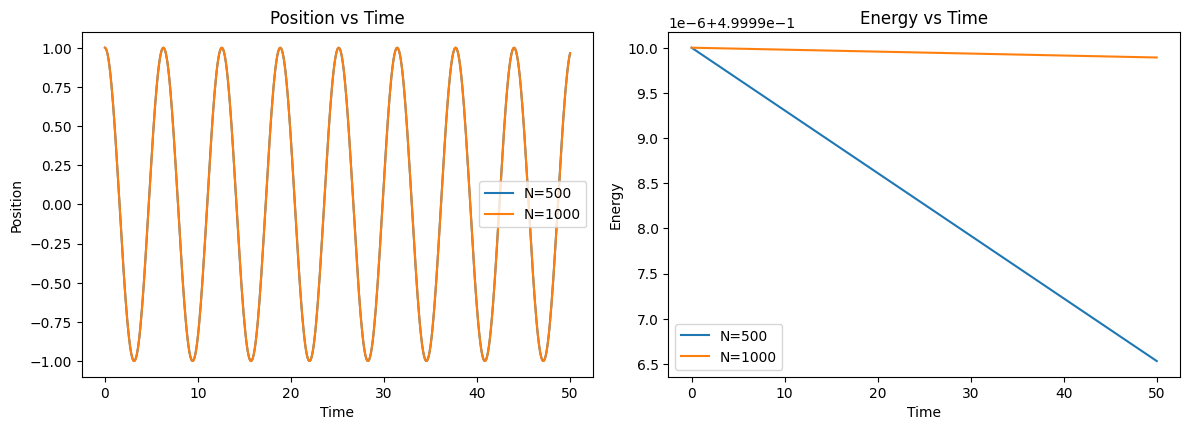

In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt

# 定义微分方程的函数，这里对应简谐运动的加速度方程：d²x/dt² = -x
def func(x):
    return -x  # 返回加速度（力函数），符合胡克定律 F = -kx（此处k=1）


"""
使用四阶龙格-库塔法求解二阶微分方程
参数说明：
f : 加速度函数（输入位置，返回加速度）
x0: 初始位置
v0: 初始速度
N : 时间步数
返回：
t : 时间数组
x : 位置数组
v : 速度数组
E : 机械能数组
"""


def runge_kutta(f, x0, v0, N):
    h = 50 / N  # 计算步长（总时间50秒）
    # 初始化数组
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    v = np.zeros(N + 1)
    E = np.zeros(N + 1)  # 能量数组（动能 + 势能）

    # 初始条件设置
    t[0] = 0
    x[0] = x0
    v[0] = v0
    E[0] = 0.5 * v0**2 + 0.5 * x0**2  # 初始机械能（动能+势能）

    # 龙格-库塔迭代
    for i in range(N):
        # 计算四组斜率（k对应速度变化，l对应位置变化）
        k1 = h * f(x[i])  # 第一阶段加速度
        l1 = h * v[i]  # 第一阶段速度

        k2 = h * f(x[i] + 0.5 * l1)  # 第二阶段加速度（使用中间位置）
        l2 = h * (v[i] + 0.5 * k1)  # 第二阶段速度（使用中间速度）

        k3 = h * f(x[i] + 0.5 * l2)  # 第三阶段加速度
        l3 = h * (v[i] + 0.5 * k2)  # 第三阶段速度

        k4 = h * f(x[i] + l3)  # 第四阶段加速度（使用最终位置）
        l4 = h * (v[i] + k3)  # 第四阶段速度（使用最终速度）

        # 更新位置和速度
        x[i + 1] = x[i] + (l1 + 2 * l2 + 2 * l3 + l4) / 6  # 加权平均更新位置
        v[i + 1] = v[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6  # 加权平均更新速度
        t[i + 1] = t[i] + h  # 更新时间

        # 计算当前机械能（理论上应该守恒）
        E[i + 1] = 0.5 * v[i + 1] ** 2 + 0.5 * x[i + 1] ** 2

    return t, x, v, E


# 主程序
if __name__ == "__main__":
    f = func  # 微分方程函数
    x0 = 1.0  # 初始位置（振幅）
    v0 = 0.0  # 初始速度（从静止开始振动）
    N1 = 500  # 时间步数1
    N2 = 1000  # 时间步数2

    # 进行两次不同精度的计算
    t1, x1, v1, E1 = runge_kutta(f, x0, v0, N1)
    t2, x2, v2, E2 = runge_kutta(f, x0, v0, N2)

    # 绘制结果
    plt.figure(figsize=(12, 8))

    # 位置-时间图
    plt.subplot(2, 2, 1)
    plt.plot(t1, x1, label="N=500")
    plt.plot(t2, x2, label="N=1000")
    plt.title("Position vs Time")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.legend()

    # 能量-时间图
    plt.subplot(2, 2, 2)
    plt.plot(t1, E1, label="N=500")
    plt.plot(t2, E2, label="N=1000")
    plt.title("Energy vs Time")
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.legend()

    plt.tight_layout()  # 调整子图间距
    plt.show()